### Scalability data analysis

In [20]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Data analysis
def plot_tps(df_list, plot_output, names):

    # Create list to store the TPS values for each DataFrame
    tps_values_list = [df["tps"] for df in df_list]

    # Calculate overall avg
    overall_sum = sum(tps.sum() for tps in tps_values_list)
    overall_count = sum(len(tps) for tps in tps_values_list)
    overall_average = overall_sum / overall_count

    # Generate statistics for each Sample
    for i, tps_values in enumerate(tps_values_list):
        print(f"Summary Statistics for Sample: {names[i]}")
        print(tps_values.describe())
        print("-" * 40)

    # Create boxplot
    plt.figure(figsize=(5, 5))
    plt.boxplot(tps_values_list, vert=True, labels=names)
    
    plt.ylabel("TPS")
    plt.title("TPS Distribution over Samplers")

    # Annotate overall average as a horizontal dashed line
    plt.axhline(y=overall_average, color='blue', linestyle='--', label=f'Overall Avg: {overall_average:.2f}')
    plt.legend()

    plt.grid(True)
    plt.tight_layout()

    plt.savefig(plot_output)
    plt.show()


In [22]:
# Load data
df_tps_50 = pd.read_csv('files/output_tx_50.csv',delimiter=",")
df_tps_500 = pd.read_csv('files/output_tx_500.csv',delimiter=",")
df_tps_1000 = pd.read_csv('files/output_tx_1000.csv',delimiter=",")
df_tps_3000 = pd.read_csv('files/output_tx_3000.csv',delimiter=",")

Summary Statistics for Sample: df_tps_50
count       59.000000
mean     19240.405254
std       3310.129175
min      11385.440000
25%      17988.080000
50%      20385.540000
75%      21906.860000
max      23601.180000
Name: tps, dtype: float64
----------------------------------------
Summary Statistics for Sample: df_tps_500
count       51.000000
mean     23949.460588
std       6361.155589
min      13331.670000
25%      19470.055000
50%      23674.670000
75%      27939.095000
max      41200.850000
Name: tps, dtype: float64
----------------------------------------
Summary Statistics for Sample: df_tps_1000
count       42.000000
mean     25946.657381
std       8626.864409
min      11549.980000
25%      17502.895000
50%      27291.485000
75%      32935.750000
max      40923.740000
Name: tps, dtype: float64
----------------------------------------
Summary Statistics for Sample: df_tps_3000
count       26.000000
mean     24107.300769
std      10303.443856
min      10693.840000
25%      15315

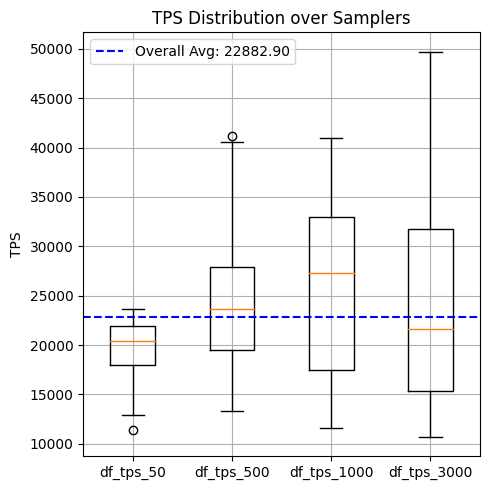

In [23]:
# Use plot_tps function
df_list = [df_tps_50, df_tps_500, df_tps_1000, df_tps_3000]
names = ["df_tps_50", "df_tps_500", "df_tps_1000", "df_tps_3000"]
plot_tps(df_list, "files/box-plot.png", names)

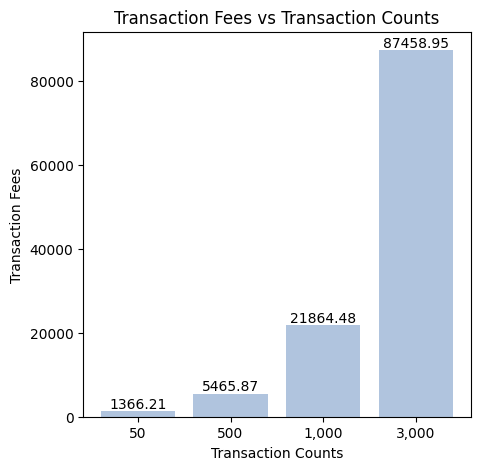

In [24]:
#Plot transaction fees

# Given data
tx_labels = ["50", "500", "1,000", "3,000"]
transaction_fees = [1366.21, 5465.87, 21864.48, 87458.95]

# Create a bar plot
plt.figure(figsize=(5, 5))
bars = plt.bar(tx_labels, transaction_fees, color='lightsteelblue')

# Add labels and title
plt.xlabel("Transaction Counts")
plt.ylabel("Transaction Fees")
plt.title("Transaction Fees vs Transaction Counts")

# Annotate the height of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.savefig("files/tx_fees.png")
plt.show()
